# Data Science Academy - Python Fundamentos - Capítulo 9

---

## Exercício: Análise Exploratória de Dados com Python

Neste exercício, você vai realizar uma análise exploratória em um dos mais famosos datasets para Machine Learning, o dataset iris com informações sobre 3 tipos de plantas. Esse dataset é comumente usado em problemas de Machine Learning de classificação, quando nosso objetivo é prever a classe dos dados. No caso deste dataset, prever a categoria de uma planta a partir de medidas da planta (sepal e petal).

Em cada célula, você encontra a tarefa a ser realizada. Faça todo o exercício e depois compare com a solução proposta.

Dataset (já disponível com o Scikit-Learn): https://archive.ics.uci.edu/ml/datasets/iris

In [1]:
# Imports
import time
import numpy as np
import pandas as pd
import matplotlib as mat
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [2]:
np.__version__

'1.20.3'

In [3]:
pd.__version__

'1.3.4'

In [4]:
mat.__version__

'3.4.3'

In [109]:
# Carregando o dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Extração e Transformação de Dados

In [110]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [111]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [112]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2

print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [113]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, pois é isso que vamos tentar prever (variável target)
df["target"] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [114]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df["target_value"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_value
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [115]:
# Extraia as features (atributos) do dataset e imprima 
df.get(["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [116]:
# Calcule a média de cada feature para as 3 classes

def calc_features_mean(df: pd.DataFrame) -> tuple[float, float, float, float]:
  sepal_len_mean = sum(df["sepal length (cm)"]) / df.shape[0]
  sepal_wid_mean = sum(df["sepal width (cm)"])  / df.shape[0]
  petal_len_mean = sum(df["petal length (cm)"]) / df.shape[0]
  petal_wid_mean = sum(df["petal width (cm)"])  / df.shape[0]
  return (sepal_len_mean, sepal_wid_mean, petal_len_mean, petal_wid_mean)

def print_features_mean(specie: str, means: tuple[float, float, float, float]) -> None:
  print(f"\n\t--- {specie} ---\n")
  print("sepal_length mean = %.2f" % means[0])
  print("sepal_width mean = %.2f" % means[1])
  print("petal_length mean = %.2f" % means[2])
  print("petal_width mean = %.2f" % means[3])

means = calc_features_mean(df[df["target_value"] == 0])
print_features_mean("setosa", means)


means = calc_features_mean(df[df["target_value"] == 1])
print_features_mean("versicolor", means)

means = calc_features_mean(df[df["target_value"] == 2])
print_features_mean("virginica", means)


	--- setosa ---

sepal_length mean = 5.01
sepal_width mean = 3.43
petal_length mean = 1.46
petal_width mean = 0.25

	--- versicolor ---

sepal_length mean = 5.94
sepal_width mean = 2.77
petal_length mean = 4.26
petal_width mean = 1.33

	--- virginica ---

sepal_length mean = 6.59
sepal_width mean = 2.97
petal_length mean = 5.55
petal_width mean = 2.03


In [131]:
# Calcule a média de cada feature para as 3 classes - By DSA
df.groupby('target').mean().T.drop("target_value")

target,setosa,versicolor,virginica
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026


## Exploração de Dados

In [117]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5.0,5.4,4.6,5.0,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3.0,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3.0,2.5,3.0,3.4,3.0
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5.0,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2.0,2.3,1.8
target,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica
target_value,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [118]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   target             150 non-null    category
 5   target_value       150 non-null    int64   
dtypes: category(1), float64(4), int64(1)
memory usage: 6.3 KB


In [119]:
# Faça um resumo estatístico do dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_value
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [136]:
# Verifique se existem valores nulos no dataset
True in df.isna()

False

In [137]:
# Verifique se existem valores nulos no dataset - By DSA
df.isnull().sum(axis=0)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_value         0
dtype: int64

In [121]:
# Faça uma contagem de valores de sepal length
df["sepal length (cm)"].count()

150

In [138]:
# Faça uma contagem de valores de sepal length - By DSA
df['sepal length (cm)'].value_counts(dropna=False)

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal length (cm), dtype: int64

## Plot

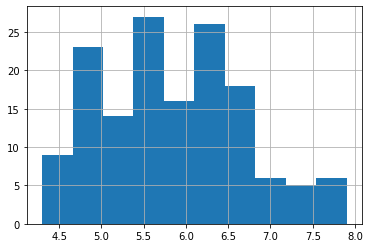

In [122]:
# Crie um Histograma de sepal length
df["sepal length (cm)"].hist()
plt.show()

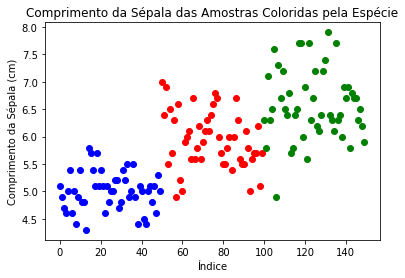

In [140]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target
plt.plot(df[df["target_value"] == 0].index, df[df["target_value"] == 0]["sepal length (cm)"], "o", color="blue")
plt.plot(df[df["target_value"] == 1].index, df[df["target_value"] == 1]["sepal length (cm)"], "o", color="red")
plt.plot(df[df["target_value"] == 2].index, df[df["target_value"] == 2]["sepal length (cm)"], "o", color="green")
plt.xlabel("Índice")
plt.ylabel("Comprimento da Sépala (cm)")
plt.title("Comprimento da Sépala das Amostras Coloridas pela Espécie")
plt.show()

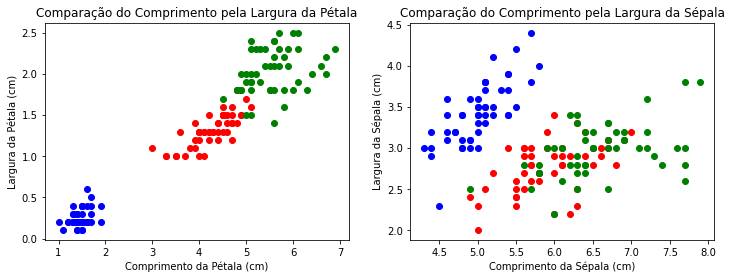

In [124]:
# Crie um Scatter Plot de 2 Features (atributos)
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(df[df["target_value"] == 0]["petal length (cm)"], df[df["target_value"] == 0]["petal width (cm)"], color="blue")
ax1.scatter(df[df["target_value"] == 1]["petal length (cm)"], df[df["target_value"] == 1]["petal width (cm)"], color="red")
ax1.scatter(df[df["target_value"] == 2]["petal length (cm)"], df[df["target_value"] == 2]["petal width (cm)"], color="green")
ax1.set_xlabel("Comprimento da Pétala (cm)")
ax1.set_ylabel("Largura da Pétala (cm)")
ax1.set_title("Comparação do Comprimento pela Largura da Pétala")


ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(df[df["target_value"] == 0]["sepal length (cm)"], df[df["target_value"] == 0]["sepal width (cm)"], color="blue")
ax2.scatter(df[df["target_value"] == 1]["sepal length (cm)"], df[df["target_value"] == 1]["sepal width (cm)"], color="red")
ax2.scatter(df[df["target_value"] == 2]["sepal length (cm)"], df[df["target_value"] == 2]["sepal width (cm)"], color="green")
ax2.set_xlabel("Comprimento da Sépala (cm)")
ax2.set_ylabel("Largura da Sépala (cm)")
ax2.set_title("Comparação do Comprimento pela Largura da Sépala")

plt.show()

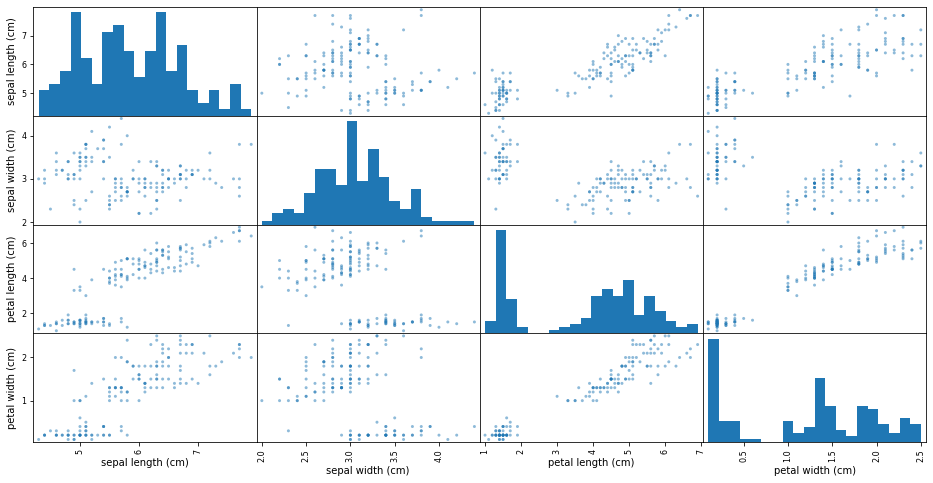

In [141]:
# Crie um Scatter Matrix das Features (atributos)
pd.plotting.scatter_matrix(df.drop(["target", "target_value"], axis=1), hist_kwds={"bins":20}, figsize=(16,8))
plt.show()

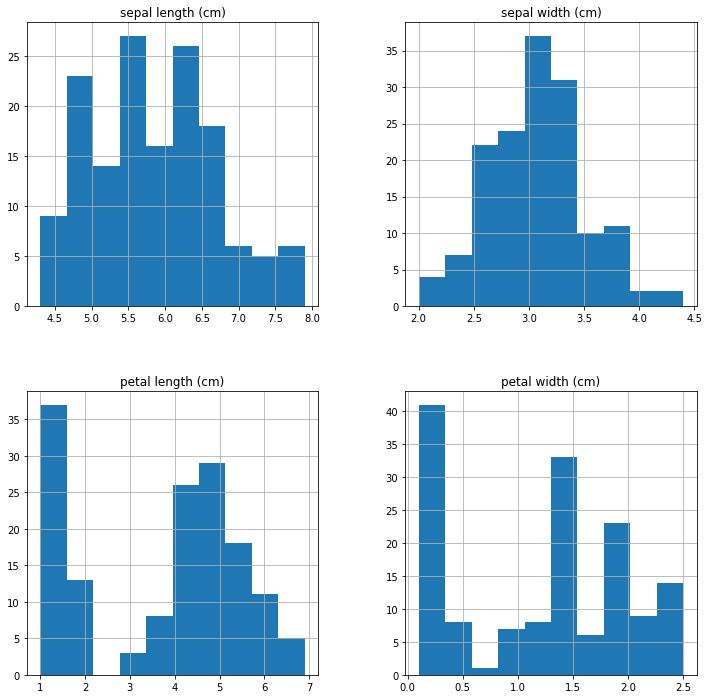

In [144]:
# Crie um Histograma de todas as features
df.drop("target_value", axis=1).hist(figsize=(12,12))
plt.show()